In [1]:
import sklearn,pandas as pd

In [2]:
sales = pd.read_csv("../datasets/Housing.csv")
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


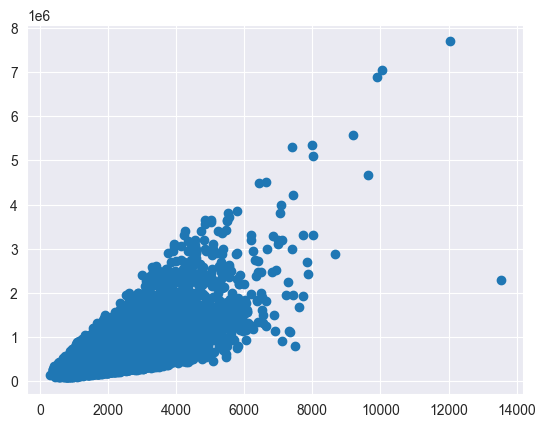

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(x=sales["sqft_living"],y=sales["price"])

In [14]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(sales,train_size=.8,test_size=.2,random_state=0)

In [15]:
#Build the reg model using only sqft_living as a feature

In [16]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error

In [17]:
sqft_model = LinearRegression()
sqft_model.fit(np.reshape(train_data["sqft_living"].values,[-1,1]),train_data["price"])

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [18]:
print(test_data['price'].mean())

529242.6123062688


In [21]:
prediction = sqft_model.predict(np.reshape(test_data['sqft_living'].values,[-1,1]))
test_price_actuals= test_data['price'].values
print(f"RMSE = {np.sqrt(mean_squared_error(test_price_actuals,prediction))}")

RMSE = 248879.06124185043


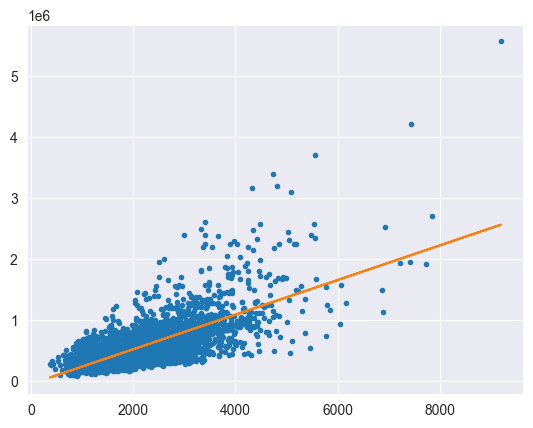

In [22]:


plt.plot(test_data['sqft_living'],
         test_data['price'],'.',
         test_data['sqft_living'],
         sqft_model.predict(np.reshape(test_data["sqft_living"].values, [-1, 1])),
         '-')



#Observations  
underfit

In [24]:
sqft_model.coef_

array([283.96855716])

Explore other features in the data

In [25]:
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

In [26]:
sales[my_features]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,zipcode
0,3,1.00,1180,5650,1.0,98178
1,3,2.25,2570,7242,2.0,98125
2,2,1.00,770,10000,1.0,98028
3,4,3.00,1960,5000,1.0,98136
4,3,2.00,1680,8080,1.0,98074
...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,98103
21609,4,2.50,2310,5813,2.0,98146
21610,2,0.75,1020,1350,2.0,98144
21611,3,2.50,1600,2388,2.0,98027


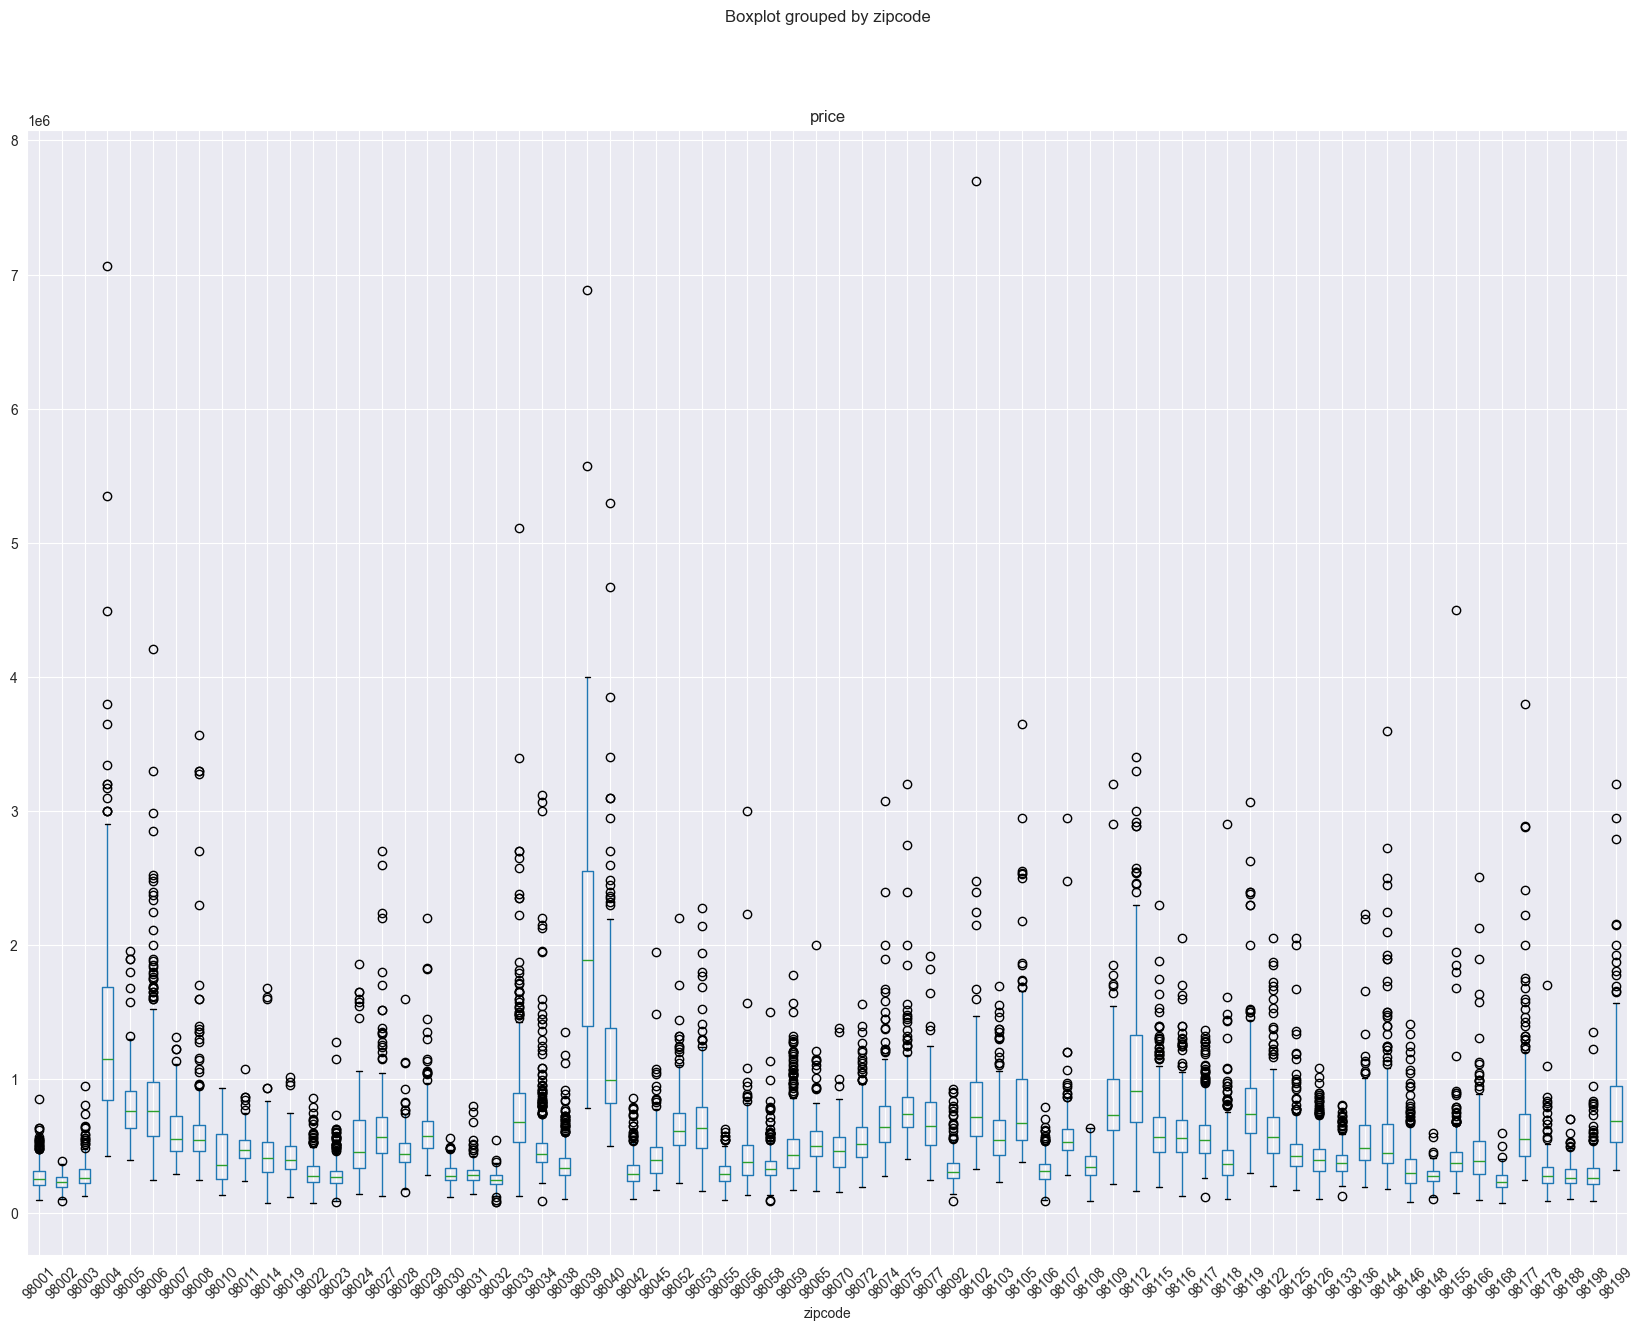

In [27]:
ax = sales.boxplot(column="price", by="zipcode",rot=45,figsize=(20,15))

98039 is the most expensive zip code

Now build a reg model with more features


In [28]:
my_features_model = LinearRegression()
my_features_model.fit(train_data[my_features].values,train_data["price"])

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


compare the results of the simple model with adding more features

In [33]:
labels = test_data['price']
prediction = sqft_model.predict(np.reshape(test_data['sqft_living'].values,[-1,1]))
test_price_actuals= labels.values
print(f"RMSE = {np.sqrt(mean_squared_error(test_price_actuals,prediction))}")

prediction = my_features_model.predict(test_data[my_features].values)
test_price_actuals= labels.values
print(f"RMSE = {np.sqrt(mean_squared_error(test_price_actuals,prediction))}")


RMSE = 248879.06124185043
RMSE = 244004.77401620414


Observations  
The RMSE has gone down from 248,879 to 244,004

Now let us apply learned models to predict prices of 3 houses

In [36]:
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Now let us pick randomly 3 rows

In [42]:
sales.sample(n=3,random_state=42)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
735,2591820310,20141006T000000,365000,4,2.25,2070,8893,2.0,0,0,...,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
2830,7974200820,20140821T000000,865000,5,3.00,2900,6730,1.0,0,0,...,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
4106,7701450110,20140815T000000,1038000,4,2.50,3770,10893,2.0,0,2,...,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685


In [47]:
house1 = sales.loc[sales['id'] == 5309101200]
house1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1054,5309101200,20140605T000000,620000,4,2.25,2400,5350,1.5,0,0,...,7,1460,940,1929,0,98117,47.6763,-122.37,1250,4880


In [48]:
house1['price']

1054    620000
Name: price, dtype: int64

In [49]:
print(sqft_model.predict(
    np.reshape(house1['sqft_living'].values,[-1,1])
))

[633267.47358128]


In [50]:
my_features_model.predict(house1[my_features].values)

array([637556.26281524])

In this case, the model with more features provided a worse prediction than the simpler model with only 1 feature. However, on average, the model with more features is always better

Prediction for a second, fancier house


In [52]:
house2= sales.loc[sales['id'] == 1925069082]
house2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1361,1925069082,20150511T000000,2200000,5,4.25,4640,22703,2.0,1,4,...,8,2860,1780,1952,0,98052,47.6393,-122.097,3140,14200


In [56]:
house2['price']

1361    2200000
Name: price, dtype: int64

In [54]:
sqft_model.predict(np.reshape(house2['sqft_living'].values,[-1,1]))

array([1269357.04160877])

In [55]:
my_features_model.predict(house2[my_features].values)

array([1274443.7635581])

In this case, the model with more features provides a better prediction. This behavior is expected here, because this house is more differentiated by features that go beyond its square feet of living space, especially the fact that it's a waterfront house.

Last house, super fancy

In [58]:
bill_gates = {'bedrooms':[8],
              'bathrooms':[25],
              'sqft_living':[50000],
              'sqft_lot':[225000],
              'floors':[4],
              'zipcode':['98039'],
              'condition':[10],
              'grade':[10],
              'waterfront':[1],
              'view':[4],
              'sqft_above':[37500],
              'sqft_basement':[12500],
              'yr_built':[1994],
              'yr_renovated':[2010],
              'lat':[47.627606],
              'long':[-122.242054],
              'sqft_living15':[5000],
              'sqft_lot15':[40000]}

In [59]:
bill_gates=pd.DataFrame(bill_gates)


In [60]:
my_features_model.predict(bill_gates[my_features].values)

array([15796988.20434227])

The model predicts a price of over $15M for this house! But we expect the house to cost much more. (There are very few samples in the dataset of houses that are this fancy, so we don't expect the model to capture a perfect prediction here.)